In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [35]:
# perform k_means in 1 dimensional case
def k_means(points, means):
    min_distance = float('inf')
    distance = 0
    mean_index = 0
    groups = {}
    for i in range(0, len(points)):
        print(i)
        for j in range(0, len(means)):
            distance = np.abs(points[i] - means[j])
            if distance < min_distance:
                min_distance = distance
                index = j
        groups[means[index]] = points[i]
    return groups

# redefine the mean based on the points assigned to the mean group
#def re_group(groups):
 #   for i in 

def create_clusters(num_points, minumum, maximum):
    points = []
    for i in range(num_points):
        points.append(random.randint(minumum, maximum))
    return points

def generate_random_means(k, minumum, maximum):
    means = []
    for i in range(0, k):
        means.append(random.randint(minumum, maximum))
    return means

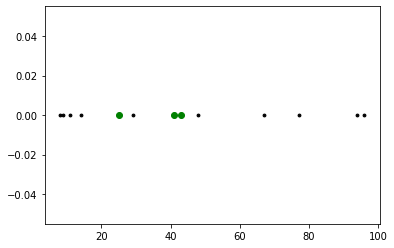

In [30]:
num_points = 10
minumum = 1
maximum = 100
k = 3
points = create_clusters(num_points, minumum, maximum)
ypoints = [0] * num_points
means = generate_random_means(k, minumum, maximum)
k_ypoints = [0] * k
plt.scatter(points, y_points, color='k', s=8)
plt.scatter(means, k_ypoints, color='g')

In [39]:
k_means(points, means)

0
1
2
3
4
5
6
7
8
9


{25: 14}